**API (Application Programming Interface) - Uygulama Programlama Arayüzü ve ENDPOINT Kavramları Nedir?**

**Erişim adresleri**

openweathermap.org (api)

https://sehirharitasiapi.ibb.gov.tr/developer/ (api)

https://www.tcmb.gov.tr/kurlar/today.xml (Endpoint)

In [ ]:
print("Merhaba, İGÜ - YAPAY ZEKA - D9 Api") # print ekrana çıktı veren bir koddur.


Merhaba, İGÜ - YAPAY ZEKA - D9 Api


In [ ]:

import sys # import python programlama dilinde yazılıma kütüphane eklemeye yarayan bir kod blogudur.
print(sys.version)

3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


In [ ]:
from google.colab import drive # google colab - drive bağlantısı

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import os

os.chdir('/content/drive/My Drive/Yapay_Zeka2')

!pwd # bize kodun çıktısını dosya yolu olarak veren kod blogudur.

/content/drive/My Drive/Yapay_Zeka2


In [ ]:

import requests
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np

from urllib.request import urlopen
from bs4 import BeautifulSoup

link_bilgisi = "https://www.tcmb.gov.tr/kurlar/today.xml"
gelen_yanit = requests.get(url=link_bilgisi)

print(gelen_yanit.text)


<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet type="text/xsl" href="isokur.xsl"?>
<Tarih_Date Tarih="25.10.2024" Date="10/25/2024"  Bulten_No="2024/203" >
	<Currency CrossOrder="0" Kod="USD" CurrencyCode="USD">
			<Unit>1</Unit>
			<Isim>ABD DOLARI</Isim>
			<CurrencyName>US DOLLAR</CurrencyName>
			<ForexBuying>34.1890</ForexBuying>
			<ForexSelling>34.2506</ForexSelling>
			<BanknoteBuying>34.1650</BanknoteBuying>
			<BanknoteSelling>34.3019</BanknoteSelling>
			<CrossRateUSD/>
			<CrossRateOther/>
		
	</Currency>
	<Currency CrossOrder="1" Kod="AUD" CurrencyCode="AUD">
			<Unit>1</Unit>
			<Isim>AVUSTRALYA DOLARI</Isim>
			<CurrencyName>AUSTRALIAN DOLLAR</CurrencyName>
			<ForexBuying>22.6123</ForexBuying>
			<ForexSelling>22.7597</ForexSelling>
			<BanknoteBuying>22.5082</BanknoteBuying>
			<BanknoteSelling>22.8963</BanknoteSelling>
				<CrossRateUSD>1.5084</CrossRateUSD>
				<CrossRateOther/>
		
	</Currency>
	<Currency CrossOrder="2" Kod="DKK" CurrencyCode="DKK">
			<Unit

In [ ]:

tree = ET.parse(urlopen(link_bilgisi))

root = tree.getroot()

liste = []

liste.append(root.findall('Currency'))


In [ ]:

for i in liste[0]:
  currencyCode = i.get('Kod')
  banknoteBuying = i.find("BanknoteSelling").text
  banknoteSelling = i.find("BanknoteBuying").text

  if currencyCode == "USD":
    print(currencyCode, banknoteBuying, banknoteSelling)
    result = float(banknoteBuying) - float(banknoteSelling)
    print("USD Banka Alış Satış Arasındaki Kur Farkı ->", result)

  if currencyCode == "EUR":
    print(currencyCode, banknoteBuying, banknoteSelling)
    result = float(banknoteBuying) - float(banknoteSelling)
    print("EUR Banka Alış Satış Arasındaki Kur Farkı ->", result)

USD 34.3019 34.1650
USD Banka Alış Satış Arasındaki Kur Farkı -> 0.13690000000000424
EUR 37.1216 36.9734
EUR Banka Alış Satış Arasındaki Kur Farkı -> 0.14820000000000277


<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet type="text/xsl" href="isokur.xsl"?>
<Tarih_Date Tarih="25.10.2024" Date="10/25/2024"  Bulten_No="2024/203" >
	<Currency CrossOrder="0" Kod="USD" CurrencyCode="USD">
			<Unit>1</Unit>
			<Isim>ABD DOLARI</Isim>
			<CurrencyName>US DOLLAR</CurrencyName>
			<ForexBuying>34.1890</ForexBuying>
			<ForexSelling>34.2506</ForexSelling>
			<BanknoteBuying>34.1650</BanknoteBuying>
			<BanknoteSelling>34.3019</BanknoteSelling>
			<CrossRateUSD/>
			<CrossRateOther/>
		
	</Currency>
	<Currency CrossOrder="1" Kod="AUD" CurrencyCode="AUD">
			<Unit>1</Unit>
			<Isim>AVUSTRALYA DOLARI</Isim>
			<CurrencyName>AUSTRALIAN DOLLAR</CurrencyName>
			<ForexBuying>22.6123</ForexBuying>
			<ForexSelling>22.7597</ForexSelling>
			<BanknoteBuying>22.5082</BanknoteBuying>
			<BanknoteSelling>22.8963</BanknoteSelling>
				<CrossRateUSD>1.5084</CrossRateUSD>
				<CrossRateOther/>
		
	</Currency>
	<Currency CrossOrder="2" Kod="DKK" CurrencyCode="DKK">
			<Unit

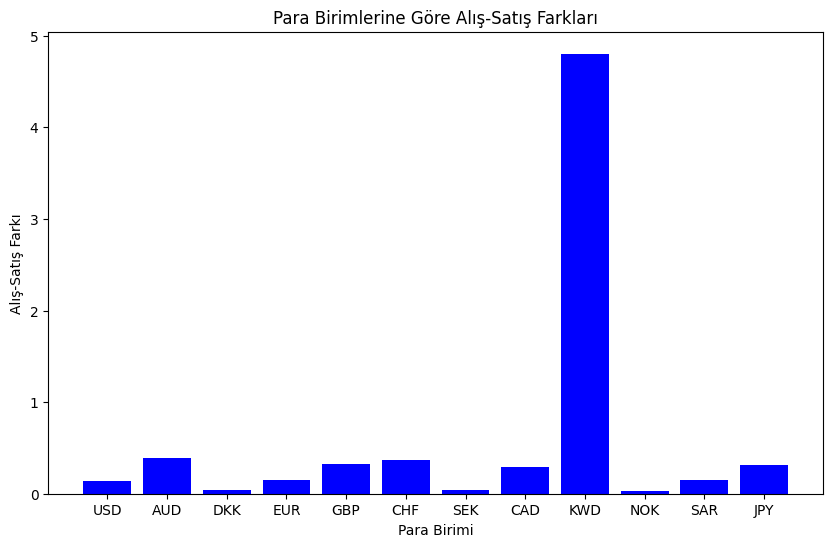

In [ ]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
from urllib.request import urlopen
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

baglanti_adresi = "https://www.tcmb.gov.tr/kurlar/today.xml"

gelen_veri = requests.get(url=baglanti_adresi)
print(gelen_veri.text)

agac = ET.parse(urlopen(baglanti_adresi))
kok = agac.getroot()

para_birimleri = []

para_birimleri.append(kok.findall('Currency'))

for i in para_birimleri[0]:
    paraBirimiKodu = i.get('Kod')
    alisFiyati = i.find("BanknoteSelling").text
    satisFiyati = i.find("BanknoteBuying").text

    if paraBirimiKodu == "USD":
        print(paraBirimiKodu, alisFiyati, satisFiyati)
        fark = float(alisFiyati) - float(satisFiyati)
        print("USD Banka Alış Satış Arasındaki Kur Farkı ->", fark)

    if paraBirimiKodu == "EUR":
        print(paraBirimiKodu, alisFiyati, satisFiyati)
        fark = float(alisFiyati) - float(satisFiyati)
        print("EUR Banka Alış Satış Arasındaki Kur Farkı ->", fark)

veri = {
    'Para Birimi': [],
    'Alış Fiyatı': [],
    'Satış Fiyatı': [],
    'Fark': []
}

for i in para_birimleri[0]:
    paraBirimiKodu = i.get('Kod')
    alisFiyati = i.find("BanknoteSelling").text
    satisFiyati = i.find("BanknoteBuying").text
    if alisFiyati is not None and satisFiyati is not None:
        fark = float(alisFiyati) - float(satisFiyati)
        veri['Para Birimi'].append(paraBirimiKodu)
        veri['Alış Fiyatı'].append(float(alisFiyati))
        veri['Satış Fiyatı'].append(float(satisFiyati))
        veri['Fark'].append(fark)

df = pd.DataFrame(veri)

plt.figure(figsize=(10, 6))
plt.bar(df['Para Birimi'], df['Fark'], color='blue')
plt.xlabel('Para Birimi')
plt.ylabel('Alış-Satış Farkı')
plt.title('Para Birimlerine Göre Alış-Satış Farkları')
plt.show()

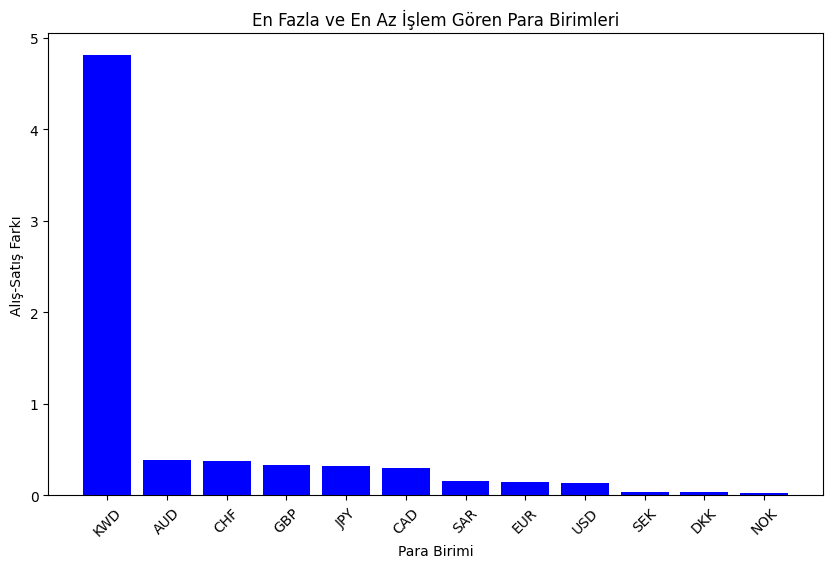

In [ ]:

df_sorted = df.sort_values(by='Fark', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Para Birimi'], df_sorted['Fark'], color='blue')
plt.xlabel('Para Birimi')
plt.ylabel('Alış-Satış Farkı')
plt.title('En Fazla ve En Az İşlem Gören Para Birimleri')
plt.xticks(rotation=45)
plt.show()

In [ ]:

# CSV dosyasına kaydetme
df_sorted.to_csv('kur_verileri_siralama.csv', index=False)

print("Veriler 'kur_verileri_siralama.csv' dosyasına kaydedildi.")

Veriler 'kur_verileri_siralama.csv' dosyasına kaydedildi.


API Kurugusu


OpenWeather API ->

In [ ]:
import requests

def hava_durumu_bilgisi_al(sehir, api_anahtari):
    base_url = "https://api.openweathermap.org/data/2.5/weather"

    params = {"q": sehir, "appid": api_anahtari, "units": "metric"}

    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()

        hava_durumu = response.json()

        print(f"Hava Durumu Bilgisi - {sehir}")
        print(f"Sıcaklık: {hava_durumu['main']['temp']} °C")
        print(f"Nem Oranı: {hava_durumu['main']['humidity']}%")
        print(f"Açıklama: {hava_durumu['weather'][0]['description']}")

    except requests.exceptions.RequestException as err:
        print(f"Hata oluştu: {err}")

if __name__ == "__main__":
    sehir_adı = input("Hava durumu bilgisini almak istediğiniz şehir adını girin: ")
    api_key = input("OpenWeatherMap API anahtarınızı girin: ")

    hava_durumu_bilgisi_al(sehir_adı, api_key)

Hava durumu bilgisini almak istediğiniz şehir adını girin: İstanbul
OpenWeatherMap API anahtarınızı girin: cb7ee2692f74979533b9516483f51f37
Hava Durumu Bilgisi - İstanbul
Sıcaklık: 17.35 °C
Nem Oranı: 63%
Açıklama: clear sky


Hava durumu bilgisini almak istediğiniz şehir adını girin: İstanbul
OpenWeatherMap API anahtarınızı girin: cb7ee2692f74979533b9516483f51f37
Hava Durumu Bilgisi - İstanbul
Sıcaklık: 17.35 °C
Nem Oranı: 63%
Açıklama: clear sky


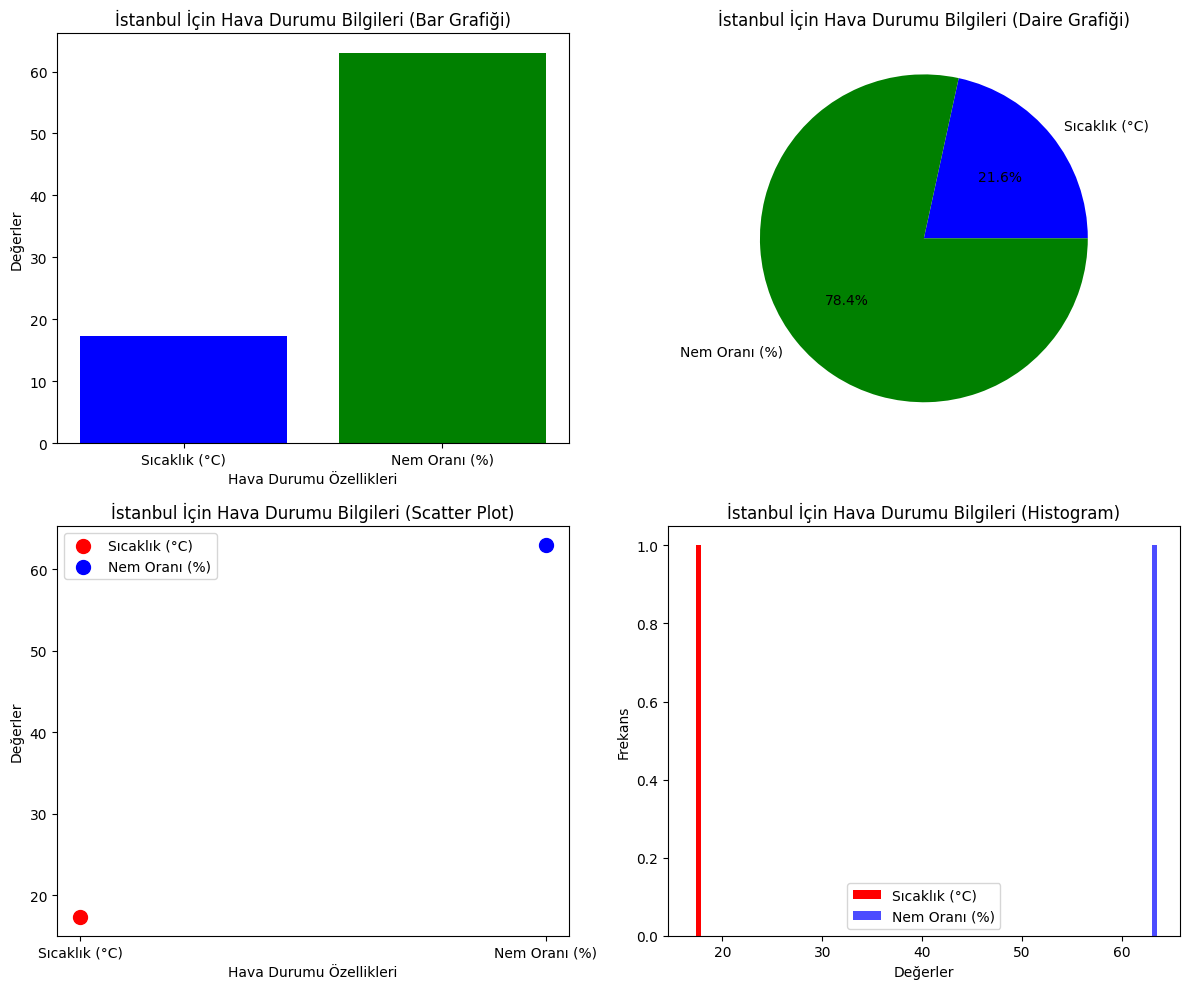

In [ ]:
import requests
import matplotlib.pyplot as plt

def hava_durumu_bilgisi_al(sehir, api_anahtari):
    base_url = "https://api.openweathermap.org/data/2.5/weather"

    params = {"q": sehir, "appid": api_anahtari, "units": "metric"}

    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()

        hava_durumu = response.json()

        print(f"Hava Durumu Bilgisi - {sehir}")
        print(f"Sıcaklık: {hava_durumu['main']['temp']} °C")
        print(f"Nem Oranı: {hava_durumu['main']['humidity']}%")
        print(f"Açıklama: {hava_durumu['weather'][0]['description']}")

        veri = {
            "Sıcaklık (°C)": hava_durumu['main']['temp'],
            "Nem Oranı (%)": hava_durumu['main']['humidity']
        }

        plt.figure(figsize=(12, 10))

        plt.subplot(2, 2, 1)
        plt.bar(veri.keys(), veri.values(), color=['blue', 'green'])
        plt.xlabel('Hava Durumu Özellikleri')
        plt.ylabel('Değerler')
        plt.title(f'{sehir} İçin Hava Durumu Bilgileri (Bar Grafiği)')

        plt.subplot(2, 2, 2)
        plt.pie(veri.values(), labels=veri.keys(), autopct='%1.1f%%', colors=['blue', 'green'])
        plt.title(f'{sehir} İçin Hava Durumu Bilgileri (Daire Grafiği)')

        plt.subplot(2, 2, 3)
        plt.scatter(['Sıcaklık (°C)'], [veri['Sıcaklık (°C)']], color='red', s=100, label='Sıcaklık (°C)')
        plt.scatter(['Nem Oranı (%)'], [veri['Nem Oranı (%)']], color='blue', s=100, label='Nem Oranı (%)')
        plt.xlabel('Hava Durumu Özellikleri')
        plt.ylabel('Değerler')
        plt.title(f'{sehir} İçin Hava Durumu Bilgileri (Scatter Plot)')
        plt.legend()

        plt.subplot(2, 2, 4)
        plt.hist([veri['Sıcaklık (°C)']], bins=2, color='red', label='Sıcaklık (°C)')
        plt.hist([veri['Nem Oranı (%)']], bins=2, color='blue', label='Nem Oranı (%)', alpha=0.7)
        plt.xlabel('Değerler')
        plt.ylabel('Frekans')
        plt.title(f'{sehir} İçin Hava Durumu Bilgileri (Histogram)')
        plt.legend()

        plt.tight_layout()
        plt.show()

    except requests.exceptions.RequestException as err:
        print(f"Hata oluştu: {err}")

if __name__ == "__main__":
    sehir_adı = input("Hava durumu bilgisini almak istediğiniz şehir adını girin: ")
    api_key = input("OpenWeatherMap API anahtarınızı girin: ")

    hava_durumu_bilgisi_al(sehir_adı, api_key)
